In [1]:
import xarray as xr

import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt


fileName = './yearly_tang.nc'
ds = xr.open_dataset(fileName)
print(ds)


<xarray.Dataset>
Dimensions:            (ncl0: 1, ncl1: 1, ncl2: 1, ncl3: 1, ncl4: 23837, ncl5: 23837, ncl6: 23837, ncl7: 54, ncl8: 54, ncl9: 54)
Dimensions without coordinates: ncl0, ncl1, ncl2, ncl3, ncl4, ncl5, ncl6, ncl7, ncl8, ncl9
Data variables:
    startYear          (ncl0) int32 ...
    endYear            (ncl1) int32 ...
    latS               (ncl2) float32 ...
    latN               (ncl3) float32 ...
    acceldate          (ncl4) float64 ...
    accelYear          (ncl5) float32 ...
    accelData          (ncl6) float32 ...
    years              (ncl7) float32 ...
    accelYearlyAvePos  (ncl8) float64 ...
    accelYearlyAveNeg  (ncl9) float64 ...


<xarray.DataArray 'accelYearlyAvePos' (ncl8: 5)>
array([13.849444, 14.084279, 15.603337, 16.214217, 17.76093 ])
Dimensions without coordinates: ncl8
<xarray.DataArray 'years' (ncl7: 5)>
array([1966., 1967., 1968., 1969., 1970.], dtype=float32)
Dimensions without coordinates: ncl7


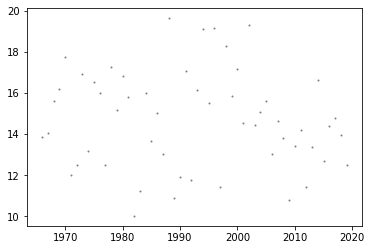

In [2]:
accel = ds.accelYearlyAvePos
years = ds.years

print(accel.head())
print(years.head())
#plt.scatter(years,accel, markersize=15)

plt.plot(years, accel, 'o', color='grey',markersize=1)


In [16]:
#data = np.vstack((years,accel)).T
#print(data)

df = pd.DataFrame({'years':years, 'accel':accel})
print(df)


     years      accel
0   1966.0  13.849444
1   1967.0  14.084279
2   1968.0  15.603337
3   1969.0  16.214217
4   1970.0  17.760930
5   1971.0  12.041397
6   1972.0  12.496519
7   1973.0  16.946648
8   1974.0  13.185642
9   1975.0  16.533455
10  1976.0  16.023714
11  1977.0  12.481713
12  1978.0  17.252840
13  1979.0  15.203945
14  1980.0  16.854535
15  1981.0  15.832776
16  1982.0  10.025842
17  1983.0  11.217745
18  1984.0  16.000429
19  1985.0  13.686175
20  1986.0  15.055031
21  1987.0  13.048286
22  1988.0  19.650556
23  1989.0  10.916454
24  1990.0  11.902487
25  1991.0  17.100401
26  1992.0  11.798822
27  1993.0  16.157059
28  1994.0  19.118842
29  1995.0  15.499794
30  1996.0  19.181253
31  1997.0  11.411232
32  1998.0  18.314037
33  1999.0  15.876193
34  2000.0  17.157022
35  2001.0  14.550934
36  2002.0  19.321480
37  2003.0  14.463427
38  2004.0  15.067975
39  2005.0  15.639777
40  2006.0  13.045923
41  2007.0  14.657671
42  2008.0  13.808887
43  2009.0  10.822221
44  2010.0

In [15]:

model = sm.OLS(accel.values,years.values)
results = model.fit()
print(results.summary())




                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              2048.
Date:                Thu, 12 Nov 2020   Prob (F-statistic):                    4.93e-44
Time:                        13:58:31   Log-Likelihood:                         -123.13
No. Observations:                  54   AIC:                                      248.3
Df Residuals:                      53   BIC:                                      250.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:

mod = smf.quantreg('accel ~ years', df)
res = mod.fit(q=.5)
print(res.summary())


In [17]:
quantiles = np.arange(.1,.95, .1)
def fit_model(q):
    res = mod.fit(q=q)
    return [q, res.params['Intercept'], res.params['years']] + \
            res.conf_int().loc['years'].tolist()

models = [fit_model(x1) for x1 in quantiles]
models = pd.DataFrame(models, columns=['q', 'a', 'b', 'lb', 'ub'])


ols = smf.ols('accel ~ years', df).fit()
ols_ci = ols.conf_int().loc['years'].tolist()
ols = dict(a = ols.params['Intercept'],
           b = ols.params['years'],
           lb = ols_ci[0],
           ub = ols_ci[1])

#print(models)
#print(ols)




print(models)



     q          a             b        lb        ub
0  0.1 -19.481096  6.038455e-05 -0.000018  0.000138
1  0.2  -8.270111 -8.401929e-06 -0.000058  0.000041
2  0.3  -5.417475  2.319437e-05 -0.000015  0.000062
3  0.4  -2.638926  4.134481e-05  0.000016  0.000066
4  0.5  -3.633792  1.032317e-04  0.000075  0.000132
5  0.6  -0.700473  1.098609e-04  0.000074  0.000146
6  0.7   2.292377  1.264866e-04  0.000083  0.000170
7  0.8   9.113898  1.039894e-04  0.000046  0.000162
8  0.9  24.679863 -6.691946e-08 -0.000097  0.000097


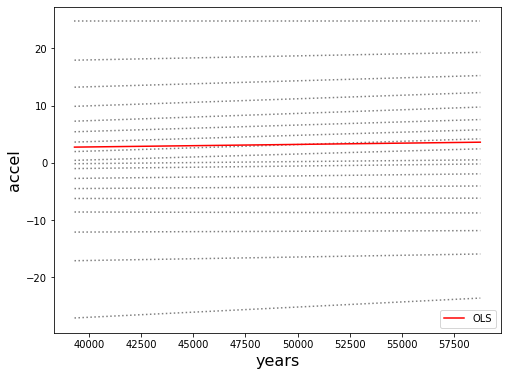

In [15]:
x = np.arange(df.years.min(), df.years.max(), 50)
get_y = lambda a, b: a + b * x

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    ax.plot(x, y, linestyle='dotted', color='grey')

y = get_y(ols['a'], ols['b'])

ax.plot(x, y, color='red', label='OLS')
#ax.scatter(df.years, df.accel,alpha=.2)
#ax.set_xlim((240, 3000))
#ax.set_ylim((240, 2000))
legend = ax.legend()
ax.set_xlabel('years', fontsize=16)
ax.set_ylabel('accel', fontsize=16);

In [ ]:
n = models.shape[0]
p1 = plt.plot(models.q, models.b, color='black', label='Quantile Reg.')
p2 = plt.plot(models.q, models.ub, linestyle='dotted', color='black')
p3 = plt.plot(models.q, models.lb, linestyle='dotted', color='black')
p4 = plt.plot(models.q, [ols['b']] * n, color='red', label='OLS')
p5 = plt.plot(models.q, [ols['lb']] * n, linestyle='dotted', color='red')
p6 = plt.plot(models.q, [ols['ub']] * n, linestyle='dotted', color='red')
plt.ylabel(r'$\beta_{income}$')
plt.xlabel('Quantiles of the conditional food expenditure distribution')
plt.legend()
plt.show()

In [ ]:
0   0.05  43.8072 -0.0195  0.0000 -0.0286 -0.0104
1   0.10  37.0139 -0.0152  0.0022 -0.0249 -0.0055
2   0.15  19.5883 -0.0056  0.3011 -0.0163  0.0050
3   0.20  12.0051 -0.0011  0.8453 -0.0121  0.0099
4   0.30  36.5700 -0.0120  0.0482 -0.0240 -0.0001
5   0.50  59.4164 -0.0207  0.0019 -0.0338 -0.0077
6   0.70  45.9860 -0.0107  0.2776 -0.0299  0.0086
7   0.80  83.1269 -0.0266  0.0209 -0.0492 -0.0040
8   0.85  70.8164 -0.0187  0.1669 -0.0451  0.0078
9   0.90  20.0855  0.0095  0.6006 -0.0260  0.0450
10  0.95  41.3255  0.0036  0.9059 -0.0557  0.0628